In [4]:

# Render plots inline as output (SHOW STUDENTS WHAT THIS LOOKS LIKE WITHOUT IT)
%matplotlib inline

# Global imports for the notebook
# NOTE: Rerun the complete notebook when imports are changed
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


In [5]:
# import the file

In [6]:
df = pd.read_csv('movie_metadata.csv', error_bad_lines=False).drop_duplicates()

In [415]:
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


# What's the probability that a movie was longer than an hour and a half? Two hours?


In [16]:
probability_half = df[df.duration > 90].count()

In [17]:
prob1 = probability_half['duration']/df['duration'].count()
prob1

0.8101545253863135

In [18]:
probability_two = df[df.duration > 120].count()
prob2 = probability_two['duration']/df['duration'].count()
prob2

0.21312462372065022

# What's the probability that a movie was directed by Stephen Spielberg?

In [19]:
directed_by = df.loc[df['director_name'] == 'Steven Spielberg'].count()

In [20]:
probabytity_directed_by = directed_by['director_name']/ df['director_name'].count()

In [21]:
probabytity_directed_by

0.005311542390194076

# What's the probability that a movie directed by Clint Eastwood will gross under budget?

In [22]:
directed_by_clint = df.loc[df['director_name'] == 'Clint Eastwood']

In [23]:
directed_by_clint[df['gross'] < df['budget']].count()['gross']

/home/andrew/codefellows/401/data-science/ENV/lib/python3.5/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


7

# What's the probability that a movie generally grossed more than its budget?

In [32]:
grossmorebudget = df[df['gross']> df['budget']].count() / df['gross'].count()
print('Probability is {:2f}%'.format(grossmorebudget['gross'] *100))

Probability is 49.272551%


# What's the probability that a movie grossed over the average gross of this data set?

In [39]:
averagegross = df['gross'].sum()/df['gross'].count()

In [40]:
sumovergross = df[df['gross'] > averagegross].count()

In [41]:
a = sumovergross/averagegross


In [43]:
print('Parobability is {:2f}%'.format(a['gross']*100))

Parobability is 0.002723%


## For ratings we'll consider a movie with at least a 6/10 to be worth renting, if not seeing in theaters. A false positive would be a movie that was highly-rated but did poorly in the box office (gross < budget). A false negative would be a movie that was poorly-rated but did great in the box office (gross < budget).

In [44]:
false_positive = df[(df['gross'] > df['budget']) & (df['imdb_score']> 6)].count()

In [45]:
false_negative = df[(df['gross'] < df['budget']) & (df['imdb_score'] < 6)].count()

In [46]:
a = false_positive/false_negative
a['gross']

2.504918032786885

# In the IMDB dataset, what are the false positive and false negative rates? Can you provide some examples of each?


In [47]:
false_p= df[(df['gross'] > df['budget']) & (df['imdb_score']> 6)]
false_p.head(5)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000


In [48]:
false_n= df[(df['gross'] < df['budget']) & (df['imdb_score']< 6)]
false_n.head(5)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
28,Color,Peter Berg,377.0,131.0,532.0,627.0,Alexander Skarsgård,14000.0,65173160.0,Action|Adventure|Sci-Fi|Thriller,...,751.0,English,USA,PG-13,209000000.0,2012.0,10000.0,5.9,2.35,44000
42,Color,Martin Campbell,436.0,123.0,258.0,326.0,Temuera Morrison,16000.0,116593191.0,Action|Adventure|Sci-Fi,...,550.0,English,USA,PG-13,200000000.0,2011.0,368.0,5.6,2.35,24000
60,Color,Roland Emmerich,367.0,158.0,776.0,310.0,Liam James,1000.0,166112167.0,Action|Adventure|Sci-Fi,...,1055.0,English,USA,PG-13,200000000.0,2009.0,468.0,5.8,2.35,13000
62,Color,Lana Wachowski,384.0,127.0,0.0,13000.0,Mila Kunis,17000.0,47375327.0,Action|Adventure|Sci-Fi,...,720.0,English,USA,PG-13,176000000.0,2015.0,15000.0,5.4,2.35,44000
71,Color,Barry Sonnenfeld,85.0,106.0,188.0,582.0,Salma Hayek,10000.0,113745408.0,Action|Comedy|Sci-Fi|Western,...,648.0,English,USA,PG-13,170000000.0,1999.0,4000.0,4.8,1.85,0


In [49]:
false_pos = false_p.count()/df['imdb_score'].count()
false_pos['imdb_score']

0.30572228891556624

In [50]:
false_neg = false_n.count()/df['imdb_score'].count()
false_neg['imdb_score']

0.12204881952781113

# If I’m a production studio exec and Tom Hanks is starring in my movie but I’m feeling uncertain about whether we should keep him (will he make as much money as we want?), tell me should I keep him in the movie or switch him out for Harrison Ford?

In [51]:
tom_hanks = df[df['actor_1_name'] == 'Tom Hanks']
harrison_ford = df[df['actor_1_name'] == 'Harrison Ford']

In [52]:
tom_hanks_number = tom_hanks[tom_hanks['gross']>tom_hanks['budget']].count() 
harrison_ford_number = harrison_ford[harrison_ford['gross']>harrison_ford['budget']].count()
if tom_hanks_number['gross']>harrison_ford_number['gross']:
    print('tom is the winner')
elif tom_hanks_number['gross']<harrison_ford_number['gross']:
    print('harrison is the winner')
else:
    print('it does not mater')  


tom is the winner


# Same as above,but I’m judging on the ratings of the movie instead of the gross/budget

In [53]:
tom_rating = tom_hanks['imdb_score'].mean()

In [54]:
harris_rating = harrison_ford['imdb_score'].mean()

In [55]:
if tom_rating> harris_rating:
    print('tom again')
elif tom_rating<harris_rating:
    print('this time is harris')
else:
    print('no ome')

tom again


# What’s the probability that a movie’s length will be between 1hr 10mins and 1h 30mins?

In [56]:
movie_length = df[(df['duration']>70) & (df['duration']<90) ].count() 

In [57]:
movie_length['duration']/df['duration'].count()

0.13245033112582782

# How does the distribution of movie budgets compare to the movie gross values

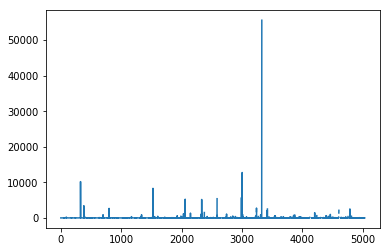

In [64]:
budgets = df[df.budget.notnull()]['budget']
grosses = df[df.gross.notnull()]['gross']
answer = budgets/grosses
answer.plot()


# Nicolas Cage is known for starring in some pretty bad movies. Are his movies statistically significantly worse (i.e. in rating) than the rest of the IMDB 5000+?

In [65]:
nick = df[(df.actor_1_name == "Nicolas Cage") | (df.actor_2_name == "Nicolas Cage") | (df.actor_3_name == "Nicolas Cage")]
not_nick = df[(df.actor_1_name != "Nicolas Cage") & (df.actor_2_name != "Nicolas Cage") & (df.actor_3_name != "Nicolas Cage")]
nick_compare = nick['imdb_score'].mean() / not_nick['imdb_score'].mean()

print('Nicolas Cage scores on average {:.2f}%'.format(1 - nick_compare))

Nicolas Cage scores on average 0.03%


# Have any years grossed a statistically-significant higher amount than the other years?

In [66]:
year = pd.DataFrame(df['gross'].groupby(df.title_year).sum() / df['gross'].mean())

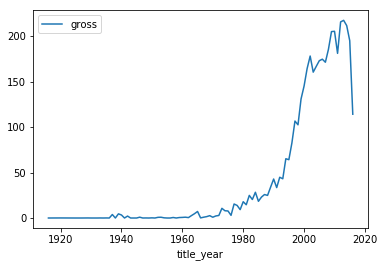

In [67]:
year.plot()

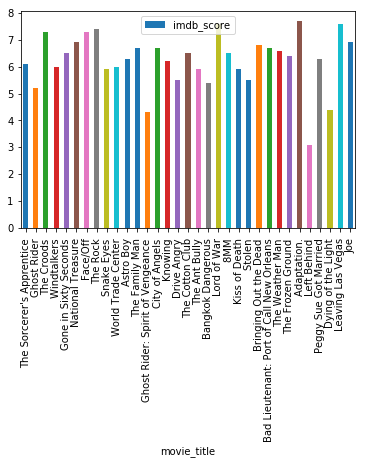

In [68]:
nick.plot(x='movie_title', y='imdb_score', kind="bar")

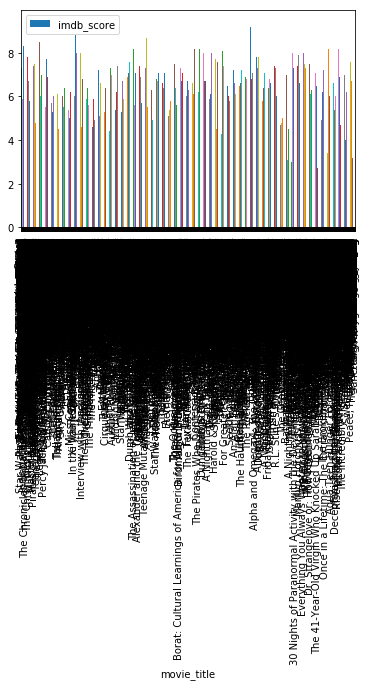

In [69]:
not_nick.plot(x='movie_title', y='imdb_score', kind="bar")